In [1]:
from gensim.models import KeyedVectors 
file = r"D:\编程\阿伟的笔记本\大三下\文献检索\tencent-ailab-embedding-zh-d100-v0.2.0-s\tencent-ailab-embedding-zh-d100-v0.2.0-s.txt"
model = KeyedVectors.load_word2vec_format(file, binary=False)
# 耗时1min 54s

In [2]:
model.save('Tencent_AILab_ChineseEmbedding.bin')
model = KeyedVectors.load('Tencent_AILab_ChineseEmbedding.bin')
# 耗时1.92s

In [3]:
words = [
    "人工智能", "自然语言处理", "通用人工智能",
    "鲁棒性", "可靠性", "图书情报",
    "机器阅读理解", "深度学习", "注意力机制",
    "神经网络", "对齐",
    "数字人文", "四库全书",
    "知识图谱", "问答系统",
    "研究热点", "关键词", "统计分析", "数据挖掘",
    "表示学习", "特征学习", "迁移学习",
    "机器翻译", "神经机器翻译", "循环神经网络"
]
for i in range(0, len(words)):
    for j in range(0, i):
#         if(words[i] in model and words[j] in model):
        model.similarity(words[i], words[j])

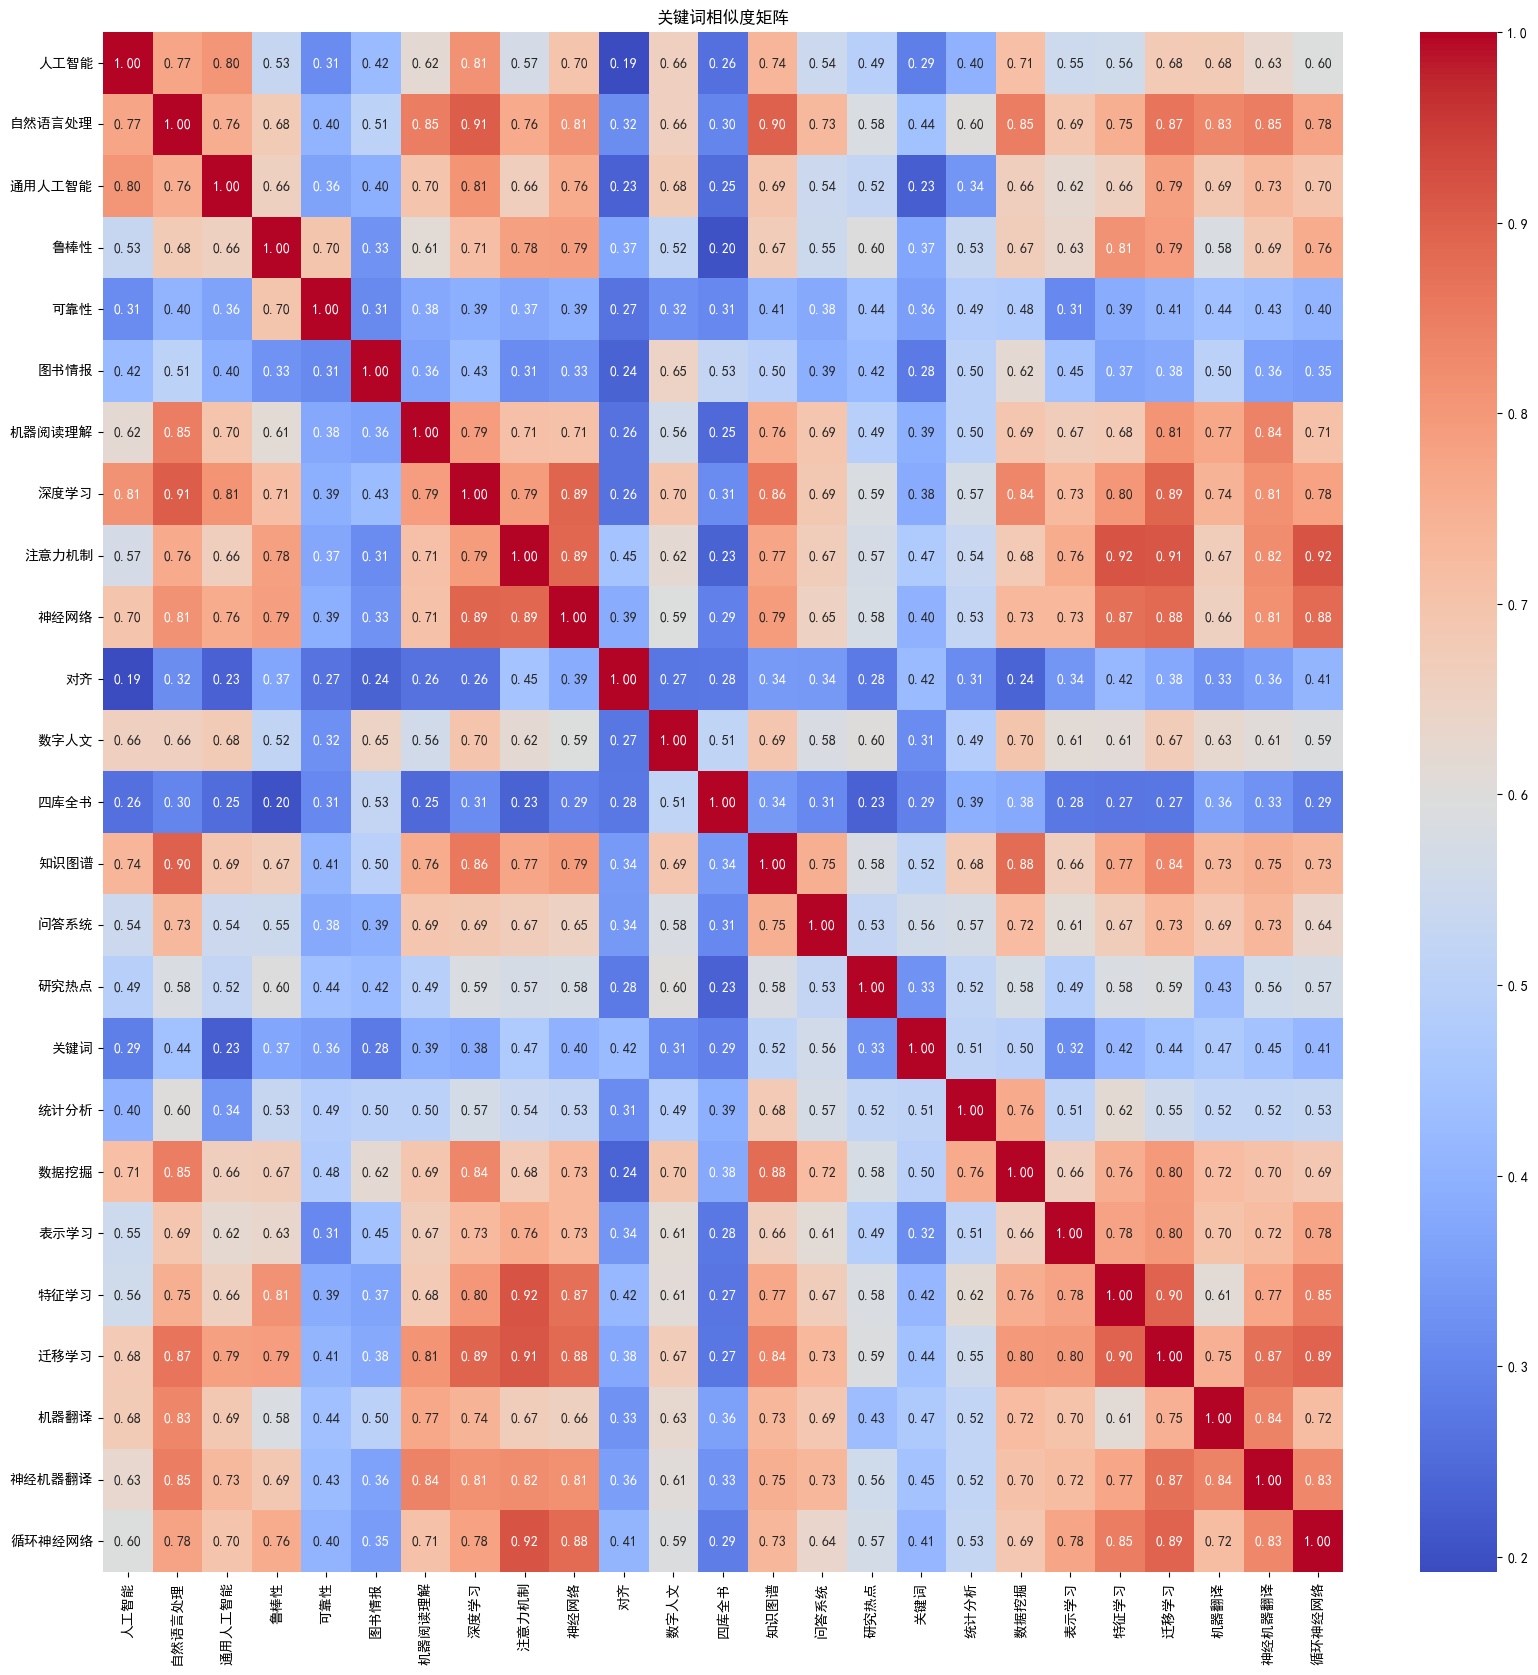

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from gensim.models import Word2Vec

from matplotlib.font_manager import FontProperties

# 设置中文字体
plt.rcParams['font.sans-serif']=['SimHei'] # 用黑体显示中文
plt.rcParams['axes.unicode_minus']=False # 正常显示负号

similarity_matrix = np.empty((len(words), len(words)))
similarity_matrix[:] = np.nan

# 计算相似度矩阵
for i in range(len(words)):
    for j in range(i+1):  # 注意这里的循环范围，避免重复计算和计算自己与自己的相似度
        try:
            similarity_matrix[i][j] = model.similarity(words[i], words[j])
            # 对称填充，因为similarity(a, b) == similarity(b, a)
            similarity_matrix[j][i] = similarity_matrix[i][j]
        except KeyError:
            # 如果某个词没有在模型的词汇表中，跳过
            pass

# 使用seaborn绘制热图
plt.figure(figsize=(20, 20))
sns.heatmap(similarity_matrix, annot=True, fmt=".2f", cmap='coolwarm', xticklabels=words, yticklabels=words)
plt.title('关键词相似度矩阵')
plt.savefig(r'D:\编程\阿伟的笔记本\大三下\文献检索\图\大模型\大模型相似度矩阵（dpi=300）.png', dpi=300)
plt.show()

In [6]:
# 获取词的向量表示
model[words[1]]
# 100维向量


array([-0.027764,  0.041761, -0.198123,  0.289357,  0.438051,  0.555001,
       -0.419287, -0.235674,  0.884193, -0.023302, -0.357946,  0.16579 ,
        0.377001, -0.724817, -0.765294, -0.203447,  0.085314, -0.527728,
        0.493756, -0.049295, -0.14552 , -0.347534, -0.346504, -0.069646,
        0.385803,  0.356598, -0.181281, -0.286176,  0.185309, -0.504661,
        0.251049, -0.599924,  0.280569, -0.425318,  0.534764,  0.699523,
       -0.151123,  0.078295,  0.768898,  0.05092 , -0.321465,  0.581789,
       -0.308635,  0.214148, -0.637313, -0.054806, -0.055924, -0.321771,
        0.109928,  0.662339, -0.464678, -0.968106, -0.813235, -0.16749 ,
        0.23474 , -0.61566 ,  0.143903,  0.092441, -0.043618, -0.919471,
       -0.385573, -0.140499, -0.115614, -0.51071 ,  0.29067 , -0.124185,
        0.801382, -0.017399, -0.005539, -0.65604 , -0.551073, -0.393192,
        0.441911, -0.5927  , -0.0834  , -0.348727, -0.772457, -0.322884,
       -0.527741,  0.136639,  0.387322, -0.352078, 

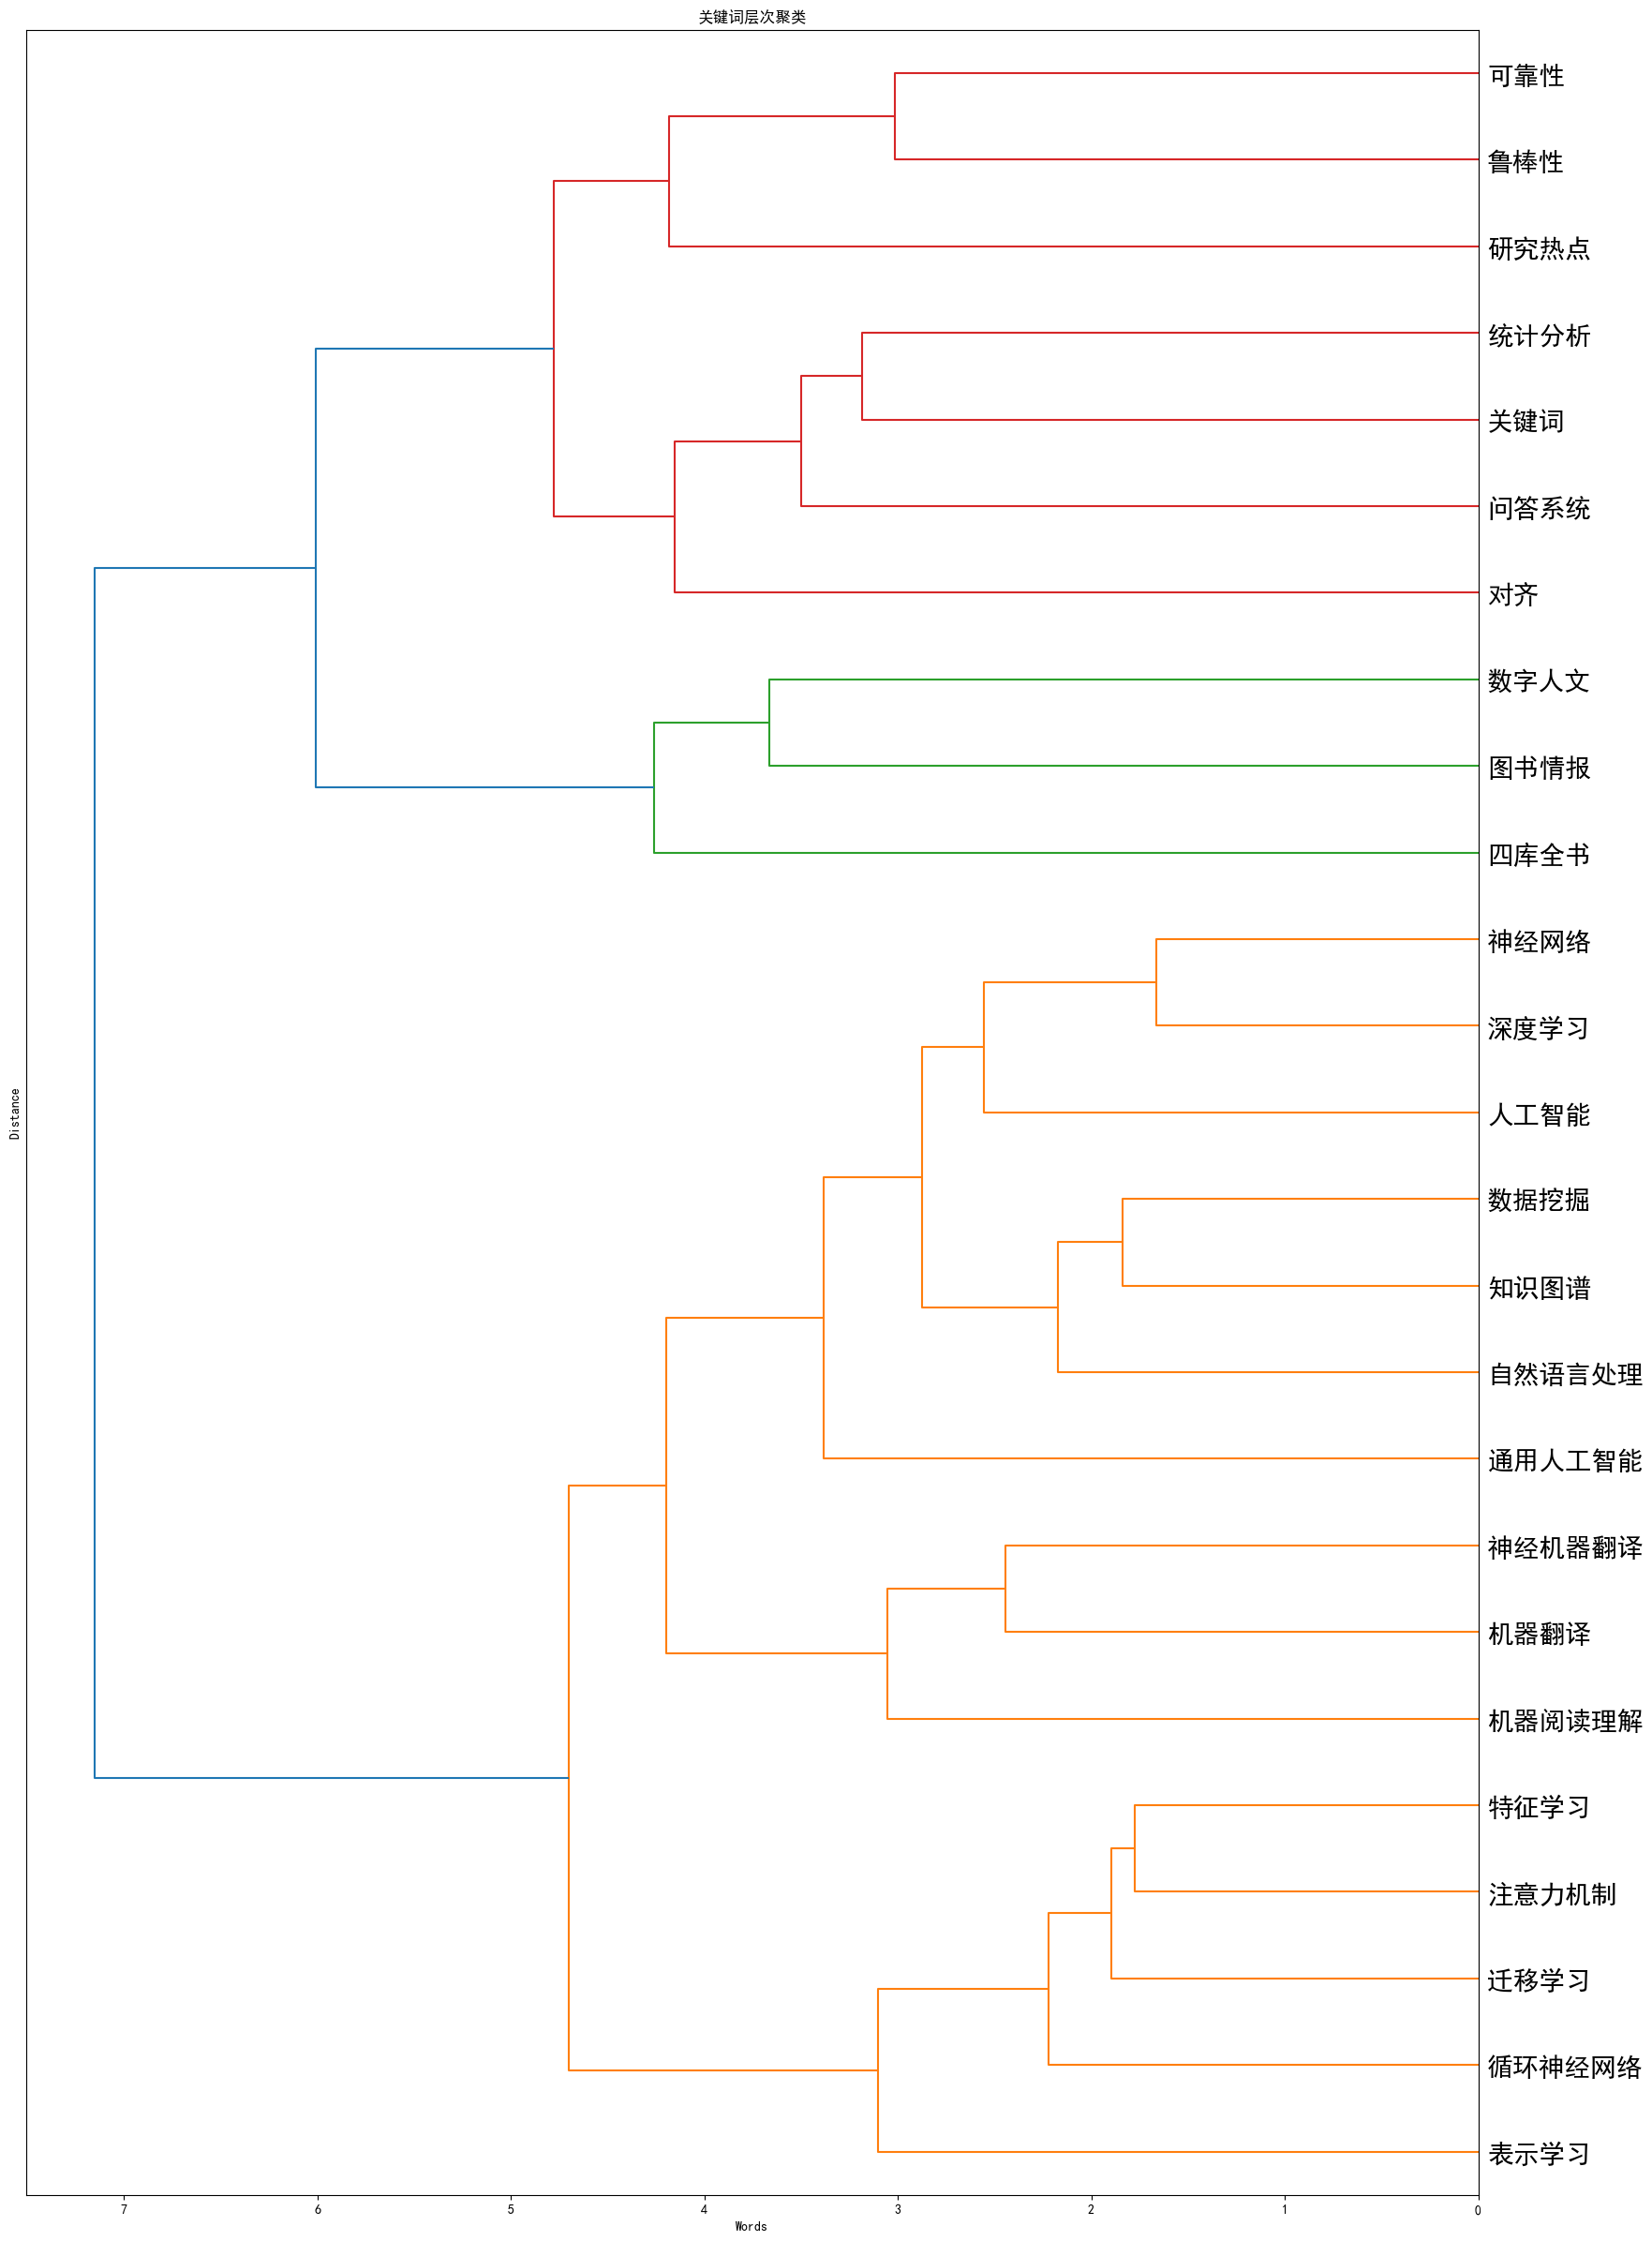

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.feature_extraction.text import TfidfVectorizer

# 假设words列表中的词已经被转换为向量表示，存储在变量word_vectors中
# word_vectors = np.array([model[word] for word in words])

# 由于您已直接提供了模型输出的词向量，我们可以直接使用这些向量
word_vectors = np.array([
    model[word] for word in words
    if word in model.index_to_key  # 确保单词在模型的词汇表中
])

# 使用TF-IDF也可以是一个选择，但这里我们直接使用词向量
# tfidf_vectorizer = TfidfVectorizer()
# tfidf_matrix = tfidf_vectorizer.fit_transform(words)
# word_vectors = tfidf_matrix.toarray()

# 计算词向量之间的距离矩阵
distances = linkage(word_vectors, method='ward')  # ward方法通常用于最小化类内方差

# 绘制树状图
plt.figure(figsize=(20, 30))
dendrogram(distances, labels=words, orientation='left', leaf_font_size=20)
plt.title('关键词层次聚类')
plt.xlabel('Words')
plt.ylabel('Distance')
plt.savefig(r'D:\编程\阿伟的笔记本\大三下\文献检索\图\大模型\大模型层次聚类（dpi=300）.png', dpi=300)
plt.show()

In [53]:
word_list = [
    "大数据", "个性化服务",
    "智慧医疗","云计算","数据采集","数据挖掘","数据访问","大数据","医疗卫生","分片技术","大数据存储","数据筛选","医疗","时间序列",
    "聚类","危险因素","先天性心脏病","并行计算","实时采集",
    "大数据","物联网","智能预测","医疗仪器","医院信息系统",
    "非小细胞肺癌","大数据","机器学习",
    "大数据","人工智能","全流程监控",
    "医疗健康","大数据技术",
    "分布式存储技术","数据库","医学大数据",
    "医疗大数据",
    "数据挖掘","医疗大数据","可视化",
    "健康医疗大数据","大数据分析","云计算",
    "大数据","临床科研","数据治理","自动化","数据共享","平台设计",
    "智能诊断","心脑血管",
    "大数据平台","精神疾病","数据治理",
    "大数据技术",
    "分布式","医疗数据",
    "医疗大数据","数据采集","数据治理","数据应用",
    "大数据","物联网","医疗","大数据挖掘",
    "大数据","医疗卫生系统","大数据技术","应用",
    "大数据","健康医疗","精准医疗",
    "中医药","健康大数据","开发","应用",
    "医院","大数据","医疗设备","管理","应用",
    "医疗信息化","大数据平台","监管","医疗行为","工作效率","质量管理",
    "大数据","医疗卫生","应用",
    "神经系统疾病","计算生物学","综述",
    "医疗大数据","临床医学","大数据分析技术","临床诊疗","医疗管理",
    "护理",
    "儿童健康管理","人工智能",
    "医疗大数据","医院药学","质量控制","医疗领域","应用场景","问题研究"
]

word_count = {}
for word in word_list:
    if word in word_count:
        word_count[word] += 1
    else:
        word_count[word] = 1

# 转换为列表，便于查看
word_frequency = [[word, count] for word, count in word_count.items()]
word_frequency.sort()  # 可选：排序，以便于阅读
word_frequency

[['个性化服务', 1],
 ['中医药', 1],
 ['临床医学', 1],
 ['临床科研', 1],
 ['临床诊疗', 1],
 ['云计算', 2],
 ['人工智能', 2],
 ['健康医疗', 1],
 ['健康医疗大数据', 1],
 ['健康大数据', 1],
 ['儿童健康管理', 1],
 ['先天性心脏病', 1],
 ['全流程监控', 1],
 ['分布式', 1],
 ['分布式存储技术', 1],
 ['分片技术', 1],
 ['医学大数据', 1],
 ['医疗', 2],
 ['医疗仪器', 1],
 ['医疗信息化', 1],
 ['医疗健康', 1],
 ['医疗卫生', 2],
 ['医疗卫生系统', 1],
 ['医疗大数据', 5],
 ['医疗数据', 1],
 ['医疗管理', 1],
 ['医疗行为', 1],
 ['医疗设备', 1],
 ['医疗领域', 1],
 ['医院', 1],
 ['医院信息系统', 1],
 ['医院药学', 1],
 ['危险因素', 1],
 ['可视化', 1],
 ['大数据', 11],
 ['大数据分析', 1],
 ['大数据分析技术', 1],
 ['大数据存储', 1],
 ['大数据平台', 2],
 ['大数据技术', 3],
 ['大数据挖掘', 1],
 ['实时采集', 1],
 ['工作效率', 1],
 ['平台设计', 1],
 ['并行计算', 1],
 ['应用', 4],
 ['应用场景', 1],
 ['开发', 1],
 ['心脑血管', 1],
 ['护理', 1],
 ['数据共享', 1],
 ['数据库', 1],
 ['数据应用', 1],
 ['数据挖掘', 2],
 ['数据治理', 3],
 ['数据筛选', 1],
 ['数据访问', 1],
 ['数据采集', 2],
 ['时间序列', 1],
 ['智慧医疗', 1],
 ['智能诊断', 1],
 ['智能预测', 1],
 ['机器学习', 1],
 ['物联网', 2],
 ['监管', 1],
 ['神经系统疾病', 1],
 ['管理', 1],
 ['精准医疗', 1],
 ['精神疾病', 1],
 ['综述', 1],
 ['聚类', 1],


In [56]:
word_freq_list = [
    ['云计算', 2],
    ['人工智能', 2],
    ['健康医疗', 1],
    ['健康医疗大数据', 1],
    ['健康大数据', 1],
    ['分布式', 1],
    ['分布式存储技术', 1],
    ['分片技术', 1],
    ['医学大数据', 1],
    ['医疗', 2],
    ['医疗仪器', 1],
    ['医疗健康', 1],
    ['医疗卫生', 2],
    ['医疗卫生系统', 1],
    ['医疗大数据', 5],
    ['医疗数据', 1],
    ['医疗管理', 1],
    ['医疗行为', 1],
    ['医疗设备', 1],
    ['医疗领域', 1],
    ['医院', 1],
    ['医院信息系统', 1],
    ['医院药学', 1],
    ['可视化', 1],
    ['大数据', 11],
    ['大数据分析', 1],
    ['大数据分析技术', 1],
    ['大数据存储', 1],
    ['大数据平台', 2],
    ['大数据技术', 3],
    ['大数据挖掘', 1],
    ['实时采集', 1],
    ['并行计算', 1],
    ['数据共享', 1],
    ['数据库', 1],
    ['数据应用', 1],
    ['数据挖掘', 2],
    ['数据治理', 3],
    ['数据筛选', 1],
    ['数据访问', 1],
    ['数据采集', 2],
    ['智慧医疗', 1],
    ['智能诊断', 1],
    ['智能预测', 1],
    ['机器学习', 1],
    ['神经系统疾病', 1],
    ['精准医疗', 1],
    ['精神疾病', 1],
]

formatted_list = [{"value": count, "name": term} for term, count in word_freq_list]
import json

print(json.dumps(formatted_list, ensure_ascii=False))
formatted_json = json.dumps(formatted_list, indent=2, ensure_ascii=False)

print(formatted_json)

[{"value": 2, "name": "云计算"}, {"value": 2, "name": "人工智能"}, {"value": 1, "name": "健康医疗"}, {"value": 1, "name": "健康医疗大数据"}, {"value": 1, "name": "健康大数据"}, {"value": 1, "name": "分布式"}, {"value": 1, "name": "分布式存储技术"}, {"value": 1, "name": "分片技术"}, {"value": 1, "name": "医学大数据"}, {"value": 2, "name": "医疗"}, {"value": 1, "name": "医疗仪器"}, {"value": 1, "name": "医疗健康"}, {"value": 2, "name": "医疗卫生"}, {"value": 1, "name": "医疗卫生系统"}, {"value": 5, "name": "医疗大数据"}, {"value": 1, "name": "医疗数据"}, {"value": 1, "name": "医疗管理"}, {"value": 1, "name": "医疗行为"}, {"value": 1, "name": "医疗设备"}, {"value": 1, "name": "医疗领域"}, {"value": 1, "name": "医院"}, {"value": 1, "name": "医院信息系统"}, {"value": 1, "name": "医院药学"}, {"value": 1, "name": "可视化"}, {"value": 11, "name": "大数据"}, {"value": 1, "name": "大数据分析"}, {"value": 1, "name": "大数据分析技术"}, {"value": 1, "name": "大数据存储"}, {"value": 2, "name": "大数据平台"}, {"value": 3, "name": "大数据技术"}, {"value": 1, "name": "大数据挖掘"}, {"value": 1, "name": "实时采集"}, {"value": 1, "name": "并行计